#  eGold, is Bitcoin a store of value?

## Introduction

For our Ironhack's third project we had to chose a topic for the analysis and we chose the Bitcoin, because it's been a topic of hot deabate over the last years and we were curious about the insights that we could find with the tools we have avaliable from the course. Then we decided to connect it a bit with the present situation thorwing in the mix a little bit of data from the Covid-19 crises that's taking over our lifes nowadays.

The questions that we asked ourselfs where these:
1. Is Bitcoins volatility much higher than the USD/EUR exchange?
2. How has the Covid-19 affected the BTC/EUR vs the USD/EUR exchange?
3. Is Bitcoin a new store of value?



## Methods of acquiring the data

As we needed to use at least two methods to get the data, we first tried to gather it using an API (since we just learned how to work with them). But we encountered the problem that the API's about cryptocurrency are mostly pay-to-have. They only let you have the daily data and we needed the historical data to be able to get some conclusions.
Then we decided we were going to use the methods of webscrapping and importing a a few csvs to gather our data.


### Methods :

- Web scraping from CoinMarketcap's website. [[1]](https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130429&end=20200420)
- Importing a csv file from YahooFinance to have the historical data of the EUR/USD exchange.[[2]](https://finance.yahoo.com/)
- Importing two csv files about the new confirmed cases and the daily deaths caused by Covid-19.[[3]](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)

## Data Wrangling and cleaning

In [1]:
from IPython.display import Image

Here are two data cleaning methods that we want to highlight:

1. Replace the comma separators from the webs numbers with empty strings to make the numbers readable by python.

2. Built a column that recreates the USD/EUR exchange from the EUR/USD by doing the invers of the first exchange.

### Without further delay, here are thestatistics and plots that led us to answer the said questions.

## 1. Bitcoin volatility vs EUR/USD Exchange volatility

From the describe of the merged dataframe we saw that since Bitcoin launched its standard deviation has been huge. In comparison with the Standard Deviation for the USD/EUR Exchange we saw the BTC/EUR's volatility is 3836.616782763622 times higher for the same time period.
But let us show you in a graph.

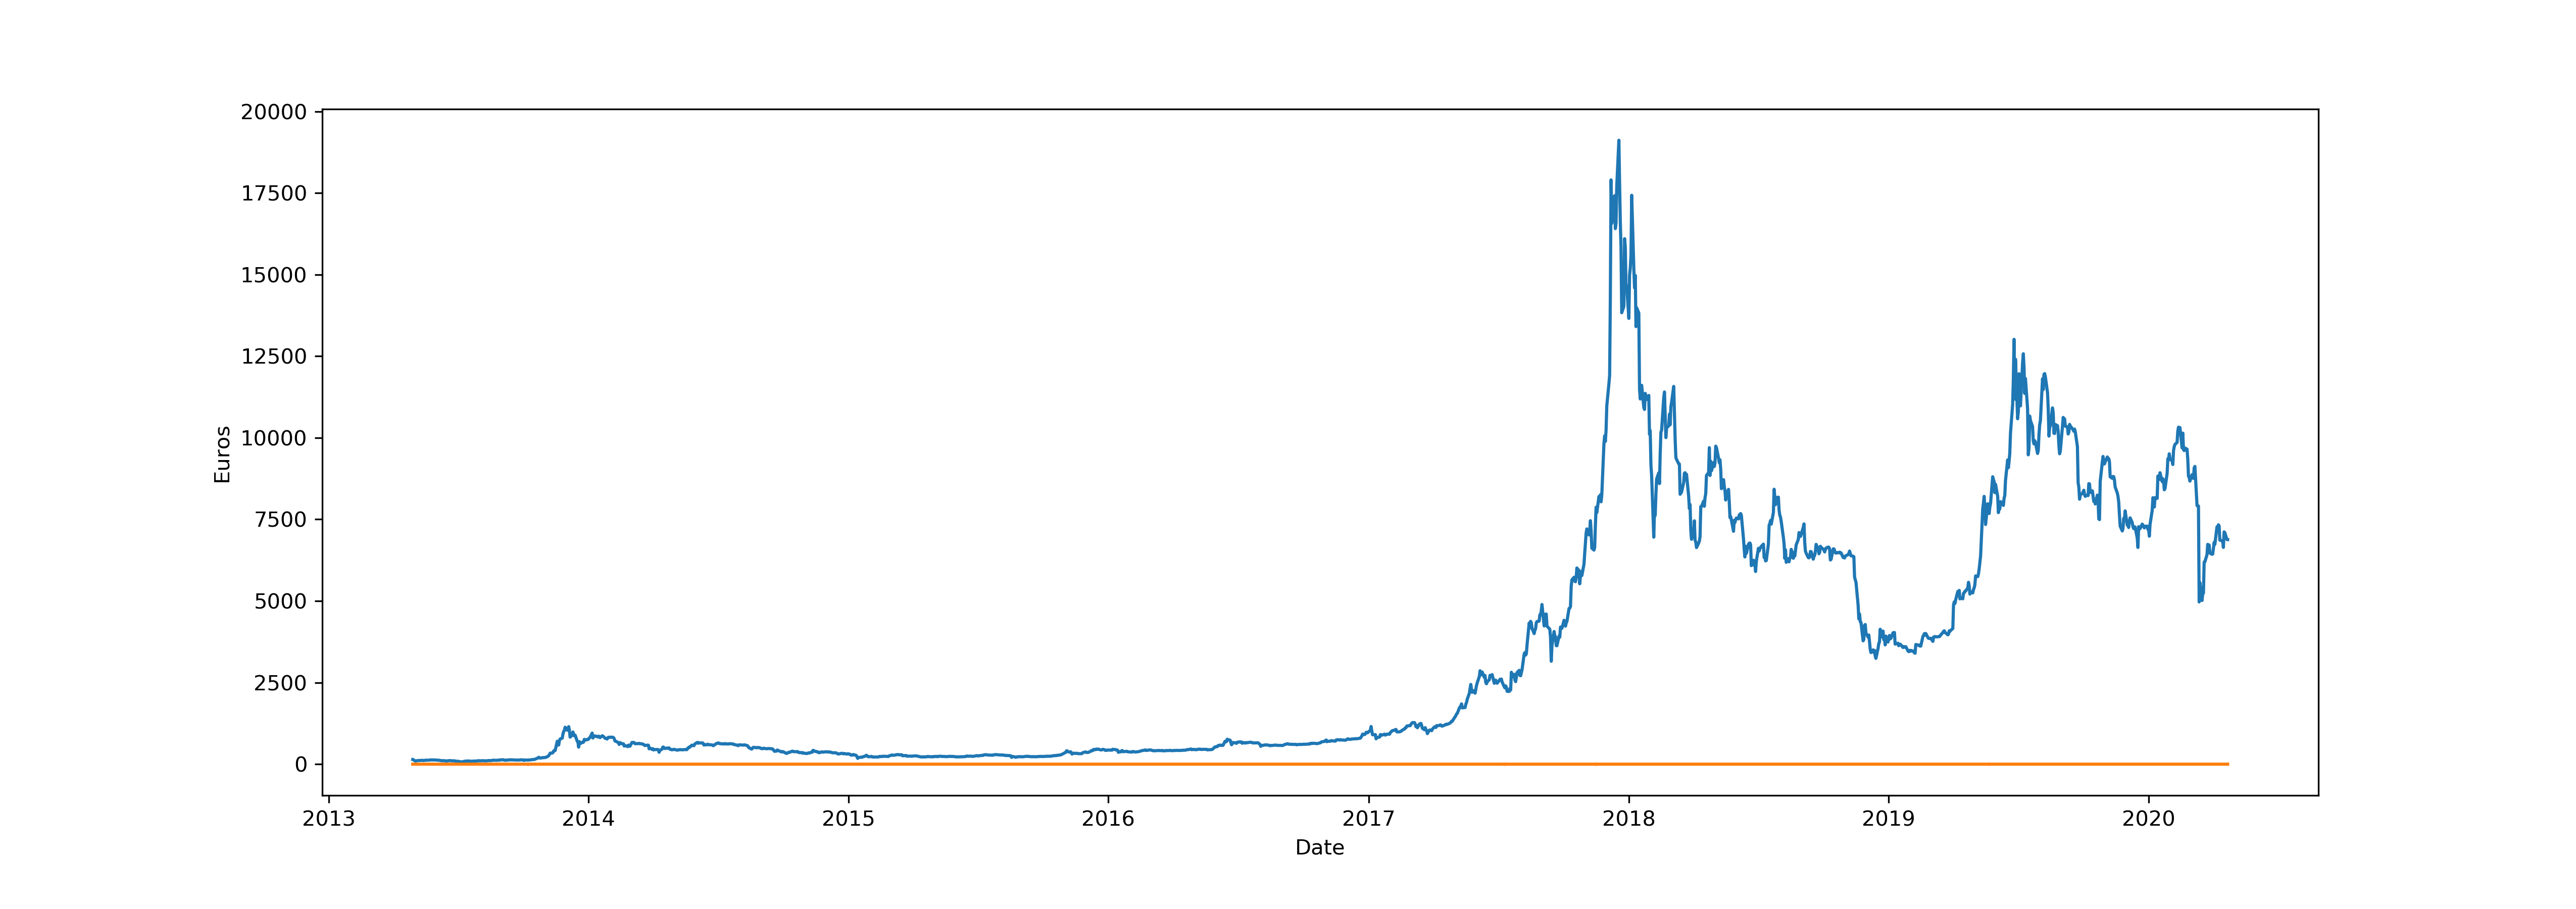

In [2]:
Image("volatility_historic.png")

Historically the USD/EUR price has been stable and we can see it keeps its behaviour as a store of value. While, as we thought, the price of the BTC is much higher than the USD/EUR as we can see in this graph.
But let's se what happens with the data from the last 365 days.

From the data about from April 2019 to April 2020 we could see that the difference in the standard deviations has reduced. With this data we can conclude that Bitcoin prices are indeed quite unstable, especially if we compare them with the price surges and lows from a fiat currency exchange, that for EUR/USD makes more than 60% of the transactions of FX market. 
[[1]](https://en.wikipedia.org/wiki/Foreign_exchange_market)

### Price Histograms

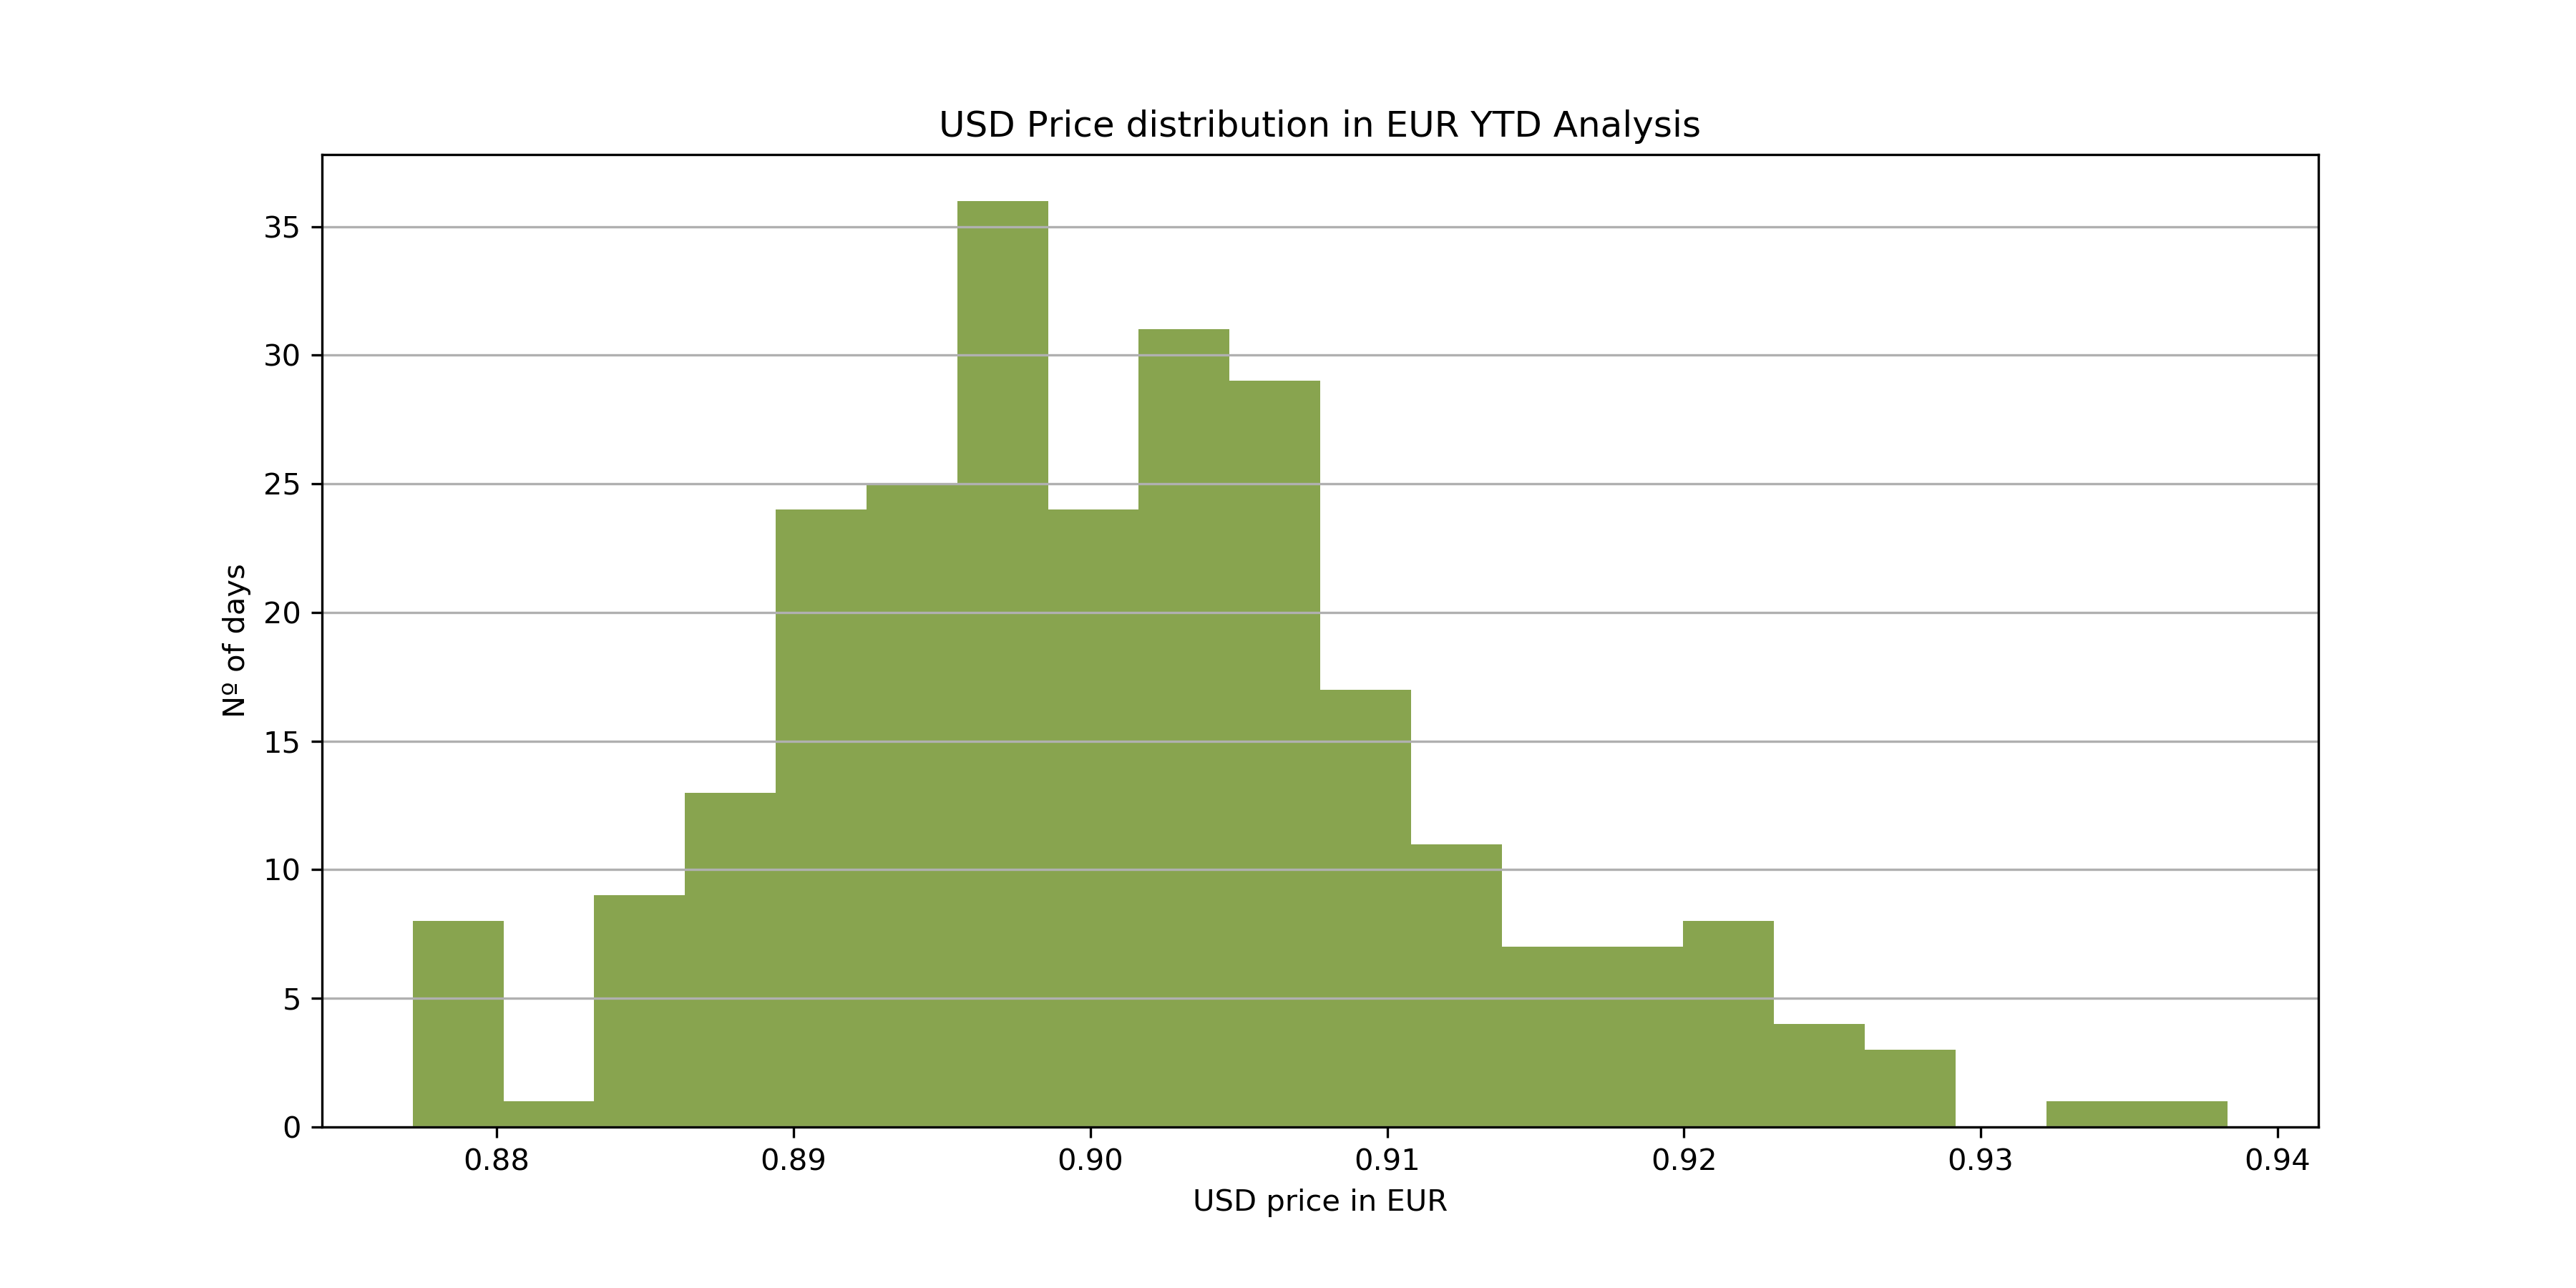

In [6]:
Image("volatility_YTD_USD_EUR.png")

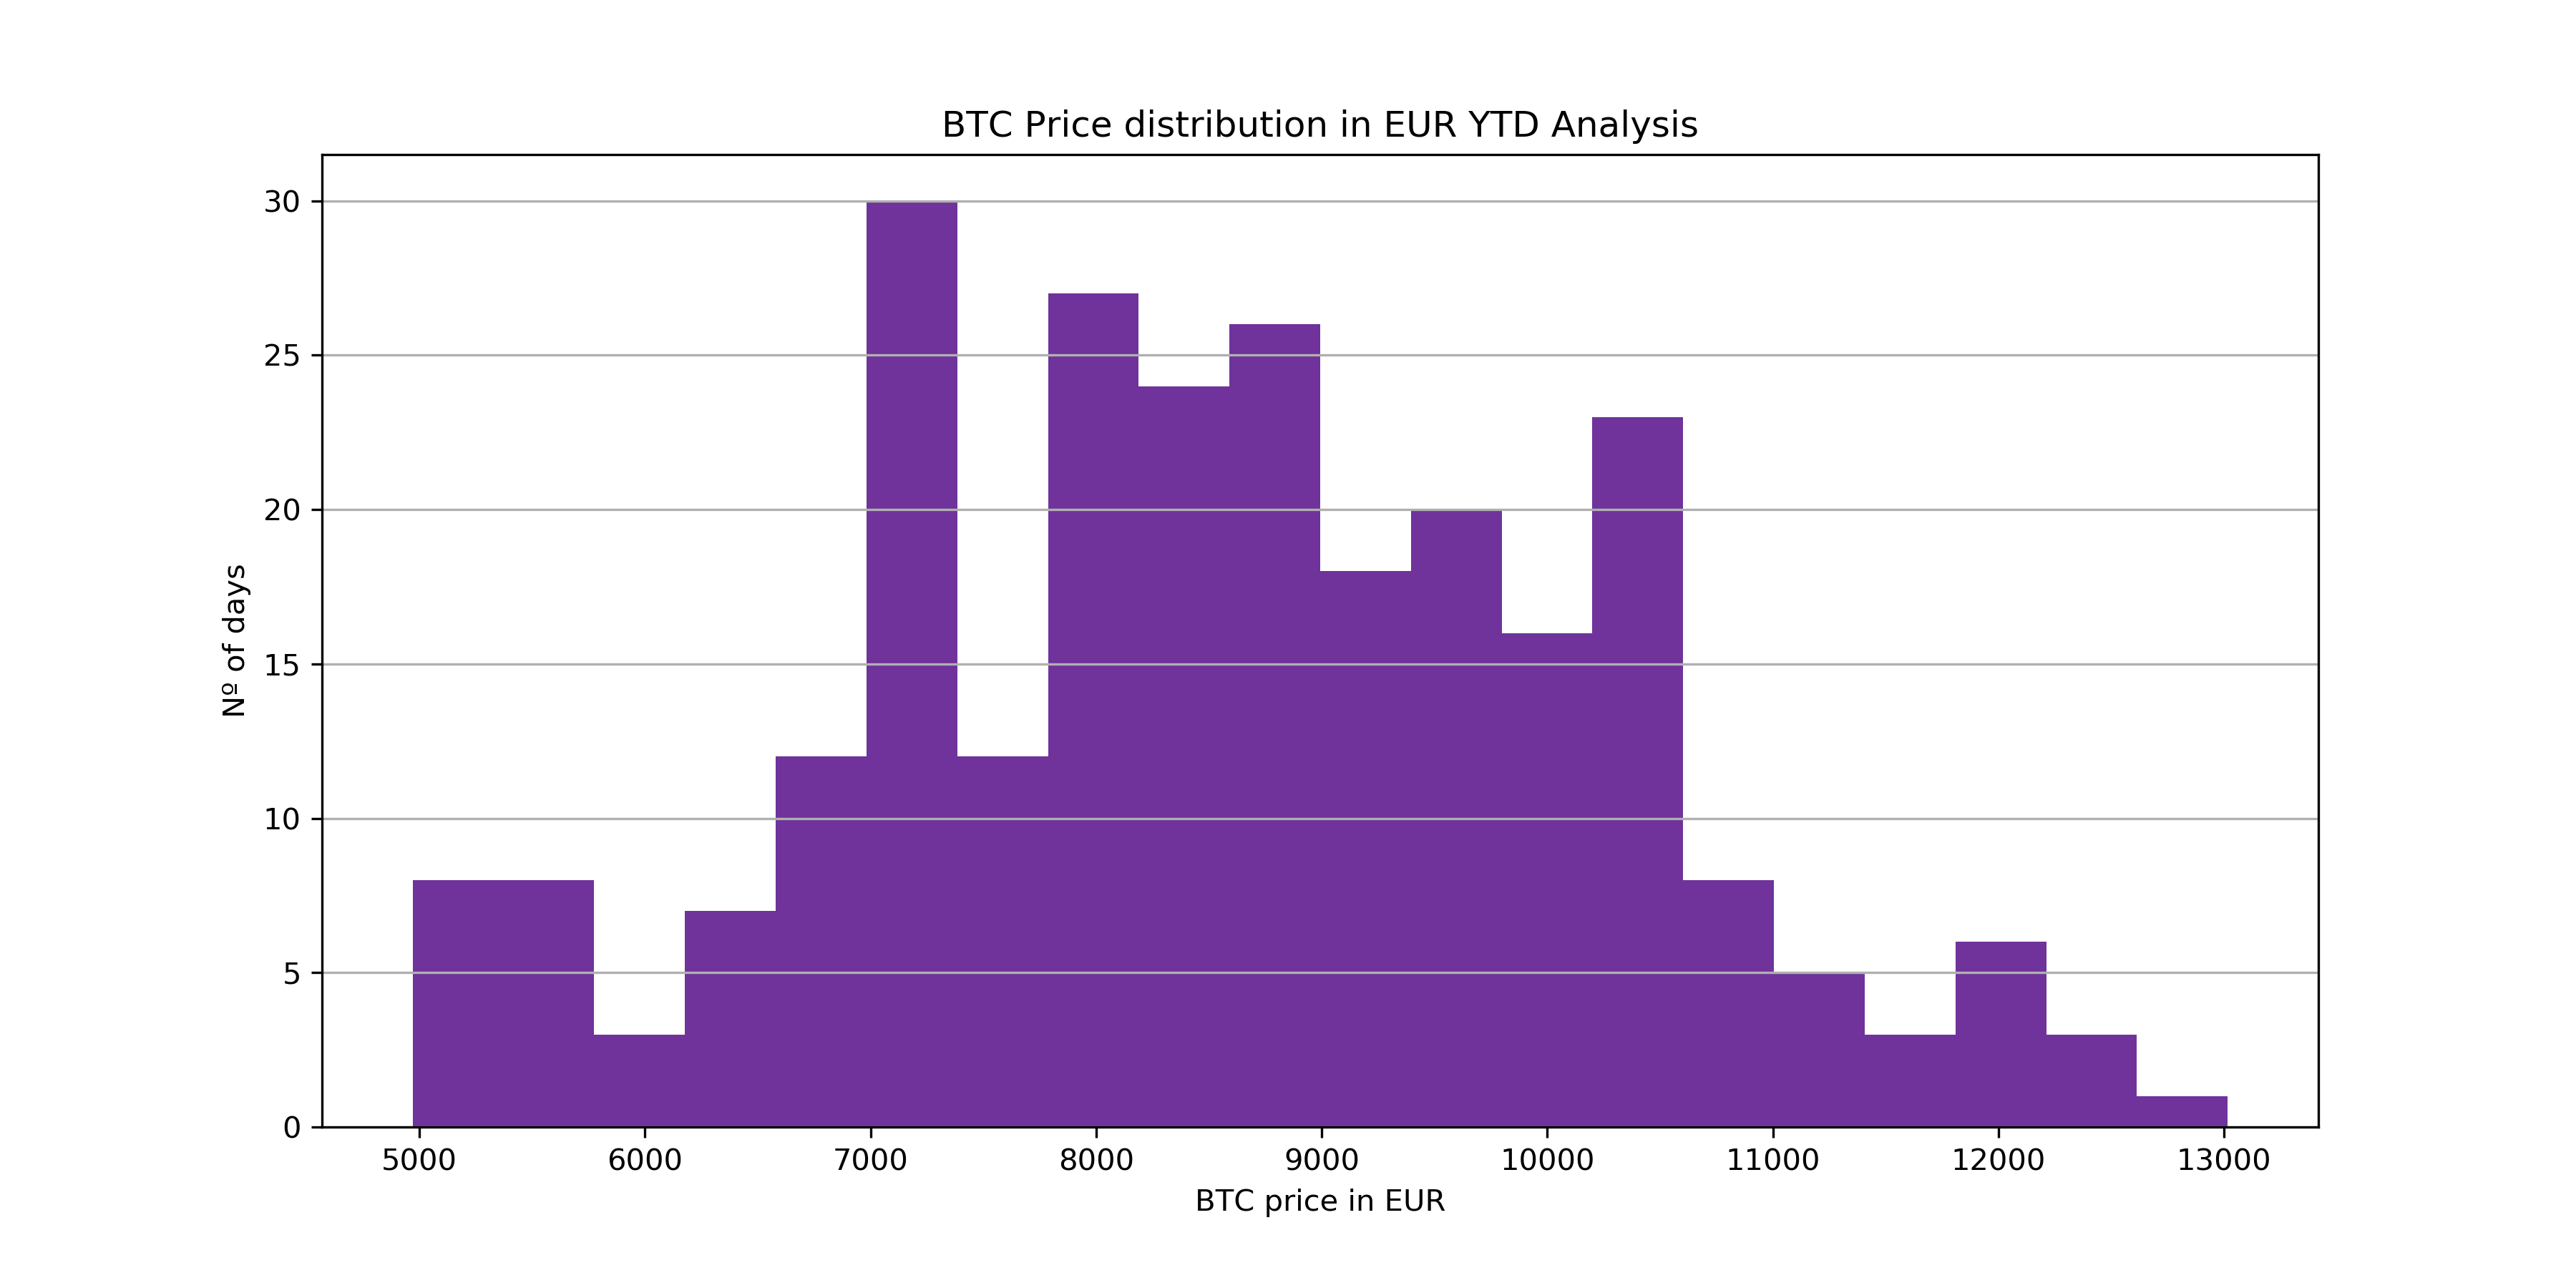

In [7]:
Image("volatility_YTD_BTC_EUR.png")

From the graphs above we can see that the behavior of the BTC/EUR and the EUR/USD exchanges are pretty similar (in relative terms because the absolute variation is still much higher with Bitcoin) and this can tell us that the value for bitcoin is stabilizing and it's starting to look normally distributed like the EUR/USD. Therefore, we can start seeing why some people would use it as a store of value (not for a European citizen yet, but if your country's currency has a higher volatility it could be a good option to go for).

## 2. How has the Covid-19 affected the BTC/EUR vs the USD/EUR exchange?

To answer this question we needed to merge the dataframe we had with a dataframe with the new daily confirmed cases and deaths of Covid-19. Once we had done that we started to get conclusions about this virus' impact to those two exchanges.

To be able to compare the data que ended up with two main columns for the Covid-19 data, one for the USA and another for the countries in the Eurozone. 

#### After building the correlation matrix and ploting 

In [36]:
#creating the correlation matrix to be able to analize how certain values influence eachother and get to conclusions.
coor_mat = YTD_covid_impact_df.corr()
coor_mat

,US,Eurozone,US_d,Eurozone_d,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
US,1.000000,0.975469,0.973699,0.994611,-0.255153,-0.265904,-0.285316,-0.254225,-0.412834,-0.443637,-0.368204,-0.403614,-0.093420,-0.398028,0.251837
Eurozone,0.975469,1.000000,0.910387,0.992878,-0.279728,-0.276759,-0.335372,-0.278026,-0.540034,-0.567826,-0.486545,-0.522099,-0.057420,-0.516622,0.276251
US_d,0.973699,0.910387,1.000000,0.949239,-0.224049,-0.239801,-0.245938,-0.223659,-0.338242,-0.367778,-0.301202,-0.332762,-0.104497,-0.327470,0.221305
Eurozone_d,0.994611,0.992878,0.949239,1.000000,-0.269567,-0.273968,-0.311426,-0.268295,-0.473284,-0.503041,-0.424390,-0.460287,-0.076988,-0.454714,0.266183
Open_EUR_USD,-0.255153,-0.279728,-0.224049,-0.269567,1.000000,0.978877,0.971993,0.999881,0.149241,0.174625,0.121170,0.152882,-0.313301,0.121077,-0.999753
High_EUR_USD,-0.265904,-0.276759,-0.239801,-0.273968,0.978877,1.000000,0.962038,0.978803,0.121739,0.149129,0.092040,0.125889,-0.266149,0.094890,-0.977380
Low_EUR_USD,-0.285316,-0.335372,-0.245938,-0.311426,0.971993,0.962038,1.000000,0.970904,0.198788,0.218170,0.180043,0.204791,-0.381403,0.171806,-0.970674
Close_EUR_USD,-0.254225,-0.278026,-0.223659,-0.268295,0.999881,0.978803,0.970904,1.000000,0.148326,0.174305,0.120520,0.152756,-0.311546,0.120984,-0.999844
Open_BTC_EUR,-0.412834,-0.540034,-0.338242,-0.473284,0.149241,0.121739,0.198788,0.148326,1.000000,0.987946,0.981316,0.970092,-0.119653,0.969026,-0.147352
High_BTC_EUR,-0.443637,-0.567826,-0.367778,-0.503041,0.174625,0.149129,0.218170,0.174305,0.987946,1.000000,0.975427,0.984911,-0.075625,0.982804,-0.172558


## Scatterplots for correlation between COVID-19 Contagions and BTC/EUR exchange and USD/EUR exchange

### We use scatter plots of COVID-19 vs BTC/EUR and USD/EUR to test the different impact of the Covid-19 to each of those markets

Text(0.5, 1.0, 'COVID-19 impact on BTC/EUR exchange')

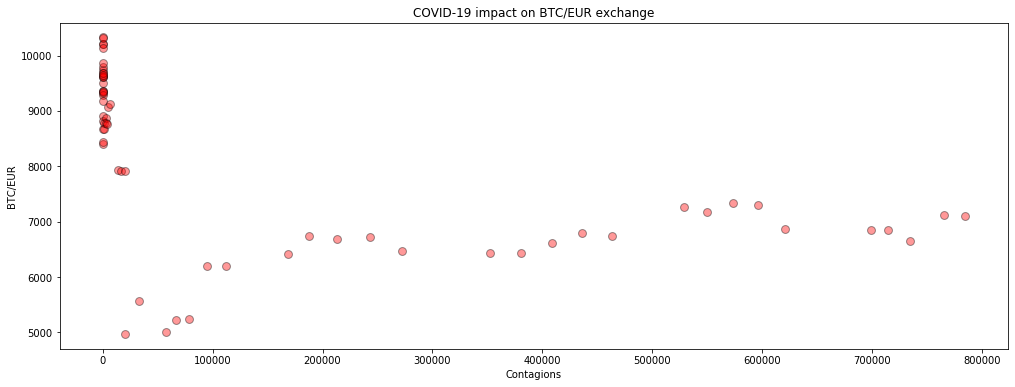

In [37]:
## COVID-19 vs BTC/EUR
plt.figure(figsize=(17,6))
plt.scatter(YTD_covid_impact_df.Eurozone, YTD_covid_impact_df.Close_BTC_EUR, label='BTC/EUR', s = 250,
            color='red',edgecolor='black',alpha=0.4, marker=".")
plt.xlabel('Contagions')
plt.ylabel('BTC/EUR')
plt.title('COVID-19 impact on BTC/EUR exchange')


Text(0, 0.5, 'USD/EUR')

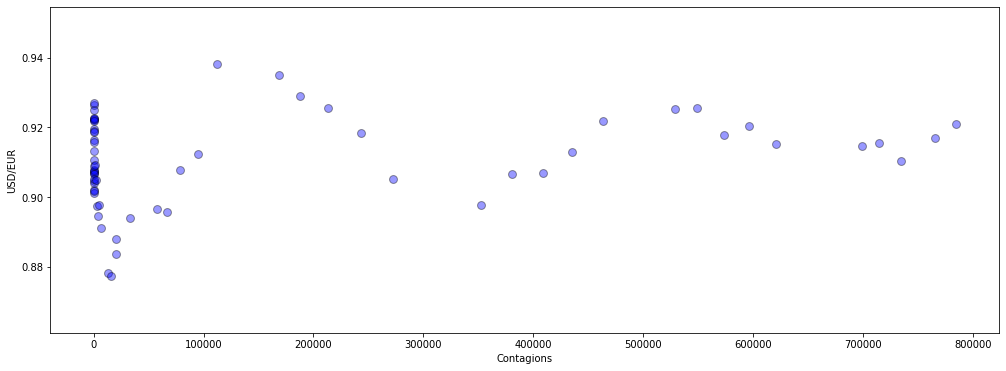

In [38]:
## COVID-19 vs USD/EUR
plt.figure(figsize=(17,6))
plt.scatter(YTD_covid_impact_df.Eurozone, YTD_covid_impact_df.Close_USD_EUR, label='USD/EUR', s = 250,
            color='blue',edgecolor='black',alpha=0.4, marker=".")
plt.xlabel('Contagions')
plt.ylabel('USD/EUR')

Here we are getting bit of a paradoxal result in the sense that by the plots it looks like covid-19's impact on the USD/EUR exchange would be stronger than on the Bitcoin price in EUR, but then the graphs don't show that same relationship so we decided to filter the data to extract those values that skew our results.

In [39]:
# Here we are getting rid of the data from the Covid-19 dataset until the cases where 25000 because that data was messing 
#with our results skewing the correlation to answers that didn't add up to our intuition.
crisis_covid_impact_df = covid_impact_df[covid_impact_df.Eurozone>=25000]
crisis_covid_impact_df.head()

,Date,US,Eurozone,US_d,Eurozone_d,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
51,2020-03-13,2179.0,33061.0,47.0,1506.0,1.118356,1.122133,1.106537,1.118493,5017.83,5838.11,4106.98,5563.71,7.415677e+10,1.016446e+11,0.89406
52,2020-03-14,2727.0,40212.0,54.0,1765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2020-03-15,3499.0,47369.0,63.0,2238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2020-03-16,4632.0,57258.0,85.0,2712.0,1.115959,1.123540,1.108869,1.115536,5385.23,5385.23,4575.36,5014.48,4.536803e+10,9.163348e+10,0.89643
55,2020-03-17,6421.0,66856.0,108.0,3281.0,1.116333,1.118906,1.095794,1.116321,5002.58,5371.35,4981.91,5225.63,3.862264e+10,9.549994e+10,0.89580


Text(0, 0.5, 'USD/EUR')

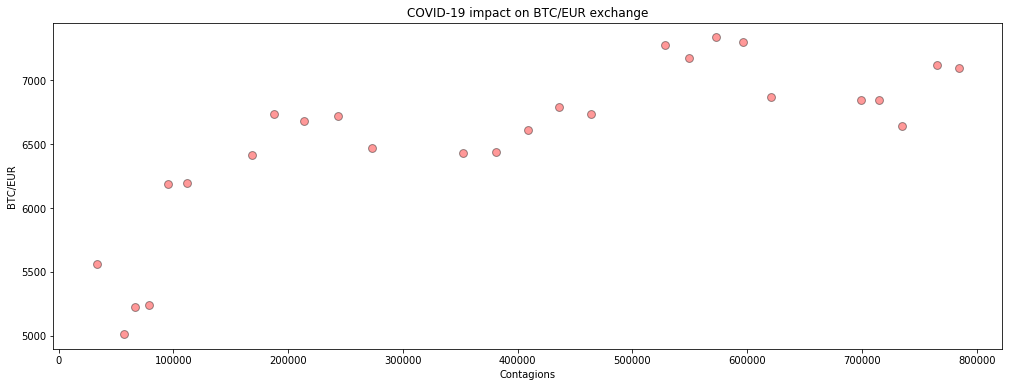

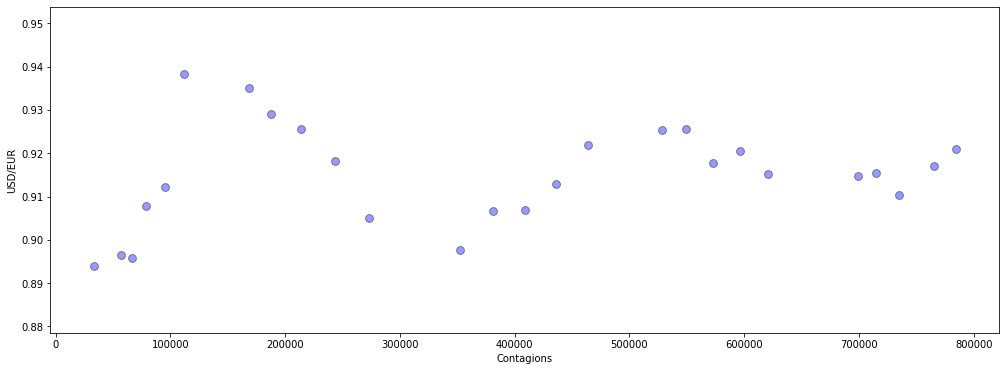

In [40]:
#Now we are plotting the same thing than above but without those extreme values
## COVID-19 vs BTC/EUR
plt.figure(figsize=(17,6))
plt.scatter(crisis_covid_impact_df.Eurozone, crisis_covid_impact_df.Close_BTC_EUR, label='BTC/EUR', s = 250,
            color='red',edgecolor='black',alpha=0.4, marker=".")
plt.xlabel('Contagions')
plt.ylabel('BTC/EUR')
plt.title('COVID-19 impact on BTC/EUR exchange')

## COVID-19 vs USD/EUR
plt.figure(figsize=(17,6))
plt.scatter(crisis_covid_impact_df.Eurozone, crisis_covid_impact_df.Close_USD_EUR, label='USD/EUR', s = 250,
            color='blue',edgecolor='black',alpha=0.4, marker=".")
plt.xlabel('Contagions')
plt.ylabel('USD/EUR')


From the plots above we can see much more clearly that the strengh of the correlation between covid-19 cases and the Bitcoin price is quite stronger than the correlation.

We can see that the price of the Bitcoin in EUR increses more than the USD/EUR exchange when the number of cases increase.

This could explain why in times like this there are people that are betting on the Bitcoin to be a better store of value than the EURO. It's clear that the fiat currncies are much more affected by external shocks such as this Covid-19 crisis that make the foundation of a country tremble.

To be sure about that we are going to build the correlations matrix again to see if after the filtering we get more conclusive results


In [41]:
#Creating the correlation matrix of the filtered data
coor_mat_this_year = crisis_covid_impact_df.corr()
coor_mat_this_year

,US,Eurozone,US_d,Eurozone_d,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
US,1.000000,0.981081,0.971204,0.996349,-0.180953,-0.336761,-0.023406,-0.184275,0.731448,0.675468,0.701274,0.691312,-0.415625,0.696385,0.175240
Eurozone,0.981081,1.000000,0.916216,0.993703,-0.216915,-0.383529,-0.046732,-0.220029,0.808792,0.754582,0.793905,0.775906,-0.477124,0.780346,0.210243
US_d,0.971204,0.916216,1.000000,0.950718,-0.155639,-0.295833,-0.027022,-0.159066,0.617068,0.564639,0.586308,0.581119,-0.366116,0.586583,0.151139
Eurozone_d,0.996349,0.993703,0.950718,1.000000,-0.199303,-0.360248,-0.035363,-0.202604,0.771022,0.715139,0.746223,0.732406,-0.442074,0.737216,0.193208
Open_EUR_USD,-0.180953,-0.216915,-0.155639,-0.199303,1.000000,0.938405,0.889315,0.999589,-0.501627,-0.614927,-0.556374,-0.585013,-0.010672,-0.582608,-0.999393
High_EUR_USD,-0.336761,-0.383529,-0.295833,-0.360248,0.938405,1.000000,0.894778,0.935639,-0.573365,-0.705982,-0.650163,-0.695760,0.065340,-0.694194,-0.932259
Low_EUR_USD,-0.023406,-0.046732,-0.027022,-0.035363,0.889315,0.894778,1.000000,0.881488,-0.227013,-0.408040,-0.354583,-0.401510,-0.049537,-0.398821,-0.881103
Close_EUR_USD,-0.184275,-0.220029,-0.159066,-0.202604,0.999589,0.935639,0.881488,1.000000,-0.507433,-0.614358,-0.559212,-0.583679,-0.007952,-0.581323,-0.999885
Open_BTC_EUR,0.731448,0.808792,0.617068,0.771022,-0.501627,-0.573365,-0.227013,-0.507433,1.000000,0.921083,0.962433,0.895969,-0.463303,0.897177,0.498665
High_BTC_EUR,0.675468,0.754582,0.564639,0.715139,-0.614927,-0.705982,-0.408040,-0.614358,0.921083,1.000000,0.915264,0.968687,-0.219519,0.968661,0.607194


In [42]:
print("Covid-19 cases correlation with the USD/EUR exchange is: ", coor_mat_this_year.Eurozone[14])
print("Covid-19 cases correlation with Bitcoin price in EUR is: ", coor_mat_this_year.Eurozone[11])

Covid-19 cases correlation with the USD/EUR exchange is:  0.21024342453783873
Covid-19 cases correlation with Bitcoin price in EUR is:  0.7759057567705124


# So...Is Bitcoin a store of value?

## There's two characteristics a store of value has to have:
- Supply is finite: The offer of it can’t be artificially boosted.
- Retaining value: A store of value is an asset that’s capable of retaining value over time.

###  The bitcoin agrees completely with the first condition as the number of bitcoins is a finit one.

### But the second condition is harder to satisfy, because it depends on two things:
1. The currency of your savings
2. The economic circumstances of the specific moment.

## 1. The currency of your savings
### If your currency is volatile in itself (like the Venezuelan Bolivar), bitcoin can be a good store of value because it has more stability and it's more worth that your fiat currency over time.
### But if your currency is a stable one (I.E. USD or EUR) bitcoin wouldn't be a good store of value in normal circumstances because of its higher volatility.

## 2. The economic circumstances of the specific moment.
### As we said above, if your currency is a strong one and the circumstances are normal, Bitcoin wouldn't be a good store of value.
### Although... what if the economy has taken an external shock?
### Then the value of its currency will be much more afected by the shock. Making the bitcoin a more stable currency. Therefore th Bitcoin becomes a better store of value.
### Nevertheless, we also think that if the shock is big enough to bring us to a post-apocalyptic scenario, we assume Bitcoin's value would drop to 0 very fast, so the risk is there.

Now we can see that the correlations tell us that the Covid-19 crisis has impacted much more to the Bitcoin price than to the
USD/EUR exchange. In other words, the more cases a the Eurozone has, the higher the Bitcoin price gets. Therefore, we can conclude that nowadays it makes sense to use Bitcoin as a _store of value_.